KLASIFIKASI :
Algoritma berbasis linear
- Support Vector Machine
- Gradient Boosting Classifier

In [3]:
import pandas as pd
import numpy as np

df_properti=pd.read_csv(r'D:\Kuliah\SEM 5\ml\UTS\UTS PMDPM_A_H2O\Dataset UTS_Gasal 2425.csv')
df_properti.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


In [4]:
df_properti2=df_properti.drop('price',axis=1)
df_properti2.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,Luxury


In [5]:
df_properti2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   squaremeters       10000 non-null  int64 
 1   numberofrooms      10000 non-null  int64 
 2   hasyard            10000 non-null  object
 3   haspool            10000 non-null  object
 4   floors             10000 non-null  int64 
 5   citycode           10000 non-null  int64 
 6   citypartrange      10000 non-null  int64 
 7   numprevowners      10000 non-null  int64 
 8   made               10000 non-null  int64 
 9   isnewbuilt         10000 non-null  object
 10  hasstormprotector  10000 non-null  object
 11  basement           10000 non-null  int64 
 12  attic              10000 non-null  int64 
 13  garage             10000 non-null  int64 
 14  hasstorageroom     10000 non-null  object
 15  hasguestroom       10000 non-null  int64 
 16  category           10000 non-null  object

In [6]:
df_properti2.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000
mean,49870.13120,50.358400,50.276300,50225.486100,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460
std,28774.37535,28.816696,28.889171,29006.675799,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641
min,89.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000
25%,25098.50000,25.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000
50%,50105.50000,50.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000
max,99999.00000,100.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000


In [7]:
print("data null \n", df_properti2.isnull().sum())
print("data kosong \n", df_properti2.empty)
print("data nan \n", df_properti2.isna().sum())

data null 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64
data kosong 
 False
data nan 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
x = df_properti2.drop(columns=['category'],axis=1)
y = y=df_properti2['category']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=72)

print(x_train.shape)
print(x_test.shape)

(7500, 16)
(2500, 16)


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

kolom_kategori=['hasyard', 'haspool', 'isnewbuilt', 'hasstormprotector', 'hasstorageroom']

transform = make_column_transformer(
    (OneHotEncoder(), kolom_kategori),remainder='passthrough'
)

In [10]:
x_train_enc=transform.fit_transform(x_train)
x_test_enc=transform.fit_transform(x_test)

df_x_train_enc=pd.DataFrame(x_train_enc,columns=transform.get_feature_names_out())
df_x_test_enc=pd.DataFrame(x_test_enc,columns=transform.get_feature_names_out())

df_x_train_enc.head(10)
df_x_test_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,22.0,19.0,71247.0,1.0,3.0,1996.0,3856.0,4186.0,765.0,4.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,32.0,26.0,90052.0,2.0,2.0,2004.0,8033.0,8013.0,983.0,9.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,78.0,57.0,10331.0,10.0,10.0,2019.0,3202.0,2431.0,787.0,10.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,98.0,84.0,8864.0,6.0,1.0,1990.0,5400.0,3533.0,875.0,6.0
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,19.0,84.0,82241.0,4.0,6.0,1995.0,8498.0,7376.0,985.0,5.0
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,82.0,25.0,99585.0,4.0,1.0,2011.0,637.0,8932.0,878.0,7.0
6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,41.0,1.0,85611.0,4.0,6.0,1994.0,7386.0,7266.0,805.0,9.0
7,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,22.0,57.0,79008.0,1.0,6.0,2006.0,1475.0,7576.0,276.0,10.0
8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,78.0,55.0,64053.0,1.0,2.0,2009.0,5454.0,7380.0,787.0,2.0
9,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,19.0,85.0,55537.0,10.0,8.0,2000.0,5004.0,7171.0,108.0,9.0


In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

y_train = pd.DataFrame(y_train, columns=['category'])
y_test = pd.DataFrame(y_test, columns=['category'])

kolom_kategori=['category']

transform = make_column_transformer(
    (OneHotEncoder(), kolom_kategori),remainder='passthrough'
)

In [12]:
y_train_enc=transform.fit_transform(y_train)
y_test_enc=transform.fit_transform(y_test)

df_train_enc=pd.DataFrame(y_train_enc, columns=transform.get_feature_names_out())
df_test_enc=pd.DataFrame(y_test_enc, columns=transform.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__category_Basic,onehotencoder__category_Luxury,onehotencoder__category_Middle
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectPercentile, SelectKBest
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pipe_svm = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select', SelectKBest()),
    ('clf', SVC(class_weight='balanced'))
])

params_grid_svm = [
    {
        'scale':[MinMaxScaler()],
        'feat_select': [SelectKBest()],
        'feat_select__k':np.arange(2,6),
        'clf__kernel':['poly', 'rbf'],
        'clf__C':[0.1,1],
        'clf__gamma':[0.1,1]
    },
    {
        'scale':[MinMaxScaler()],
        'feat_select':[SelectPercentile()],
        'feat_select__percentile':np.arange(20,50),
        'clf__kernel':['poly', 'rbf'],
        'clf__C':[0.1,1],
        'clf__gamma':[0.1,1]
    },
    {
        'scale':[StandardScaler()],
        'feat_select': [SelectKBest()],
        'feat_select__k':np.arange(2,6),
        'clf__kernel':['poly', 'rbf'],
        'clf__C':[0.1,1],
        'clf__gamma':[0.1,1]
    },
    {
        'scale':[StandardScaler()],
        'feat_select':[SelectPercentile()],
        'feat_select__percentile':np.arange(20,50),
        'clf__kernel':['poly', 'rbf'],
        'clf__C':[0.1,1],
        'clf__gamma':[0.1,1]
    }, 
]

estimator_svm = Pipeline(pipe_svm)
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=72)e

GSCV_SVM = GridSearchCV(pipe_svm, params_grid_svm, cv=SKF, n_jobs=-1)
GSCV_SVM.fit(x_train_enc, y_train.values.ravel())

print("GSCV training finished")

GSCV training finished


CV Score: 0.9930666666666668
Test Score: 0.9932
Best Model: {} Pipeline(steps=[('scale', StandardScaler()),
                ('feat_select', SelectPercentile(percentile=36)),
                ('clf',
                 SVC(C=1, class_weight='balanced', gamma=1, kernel='poly'))])
Best Features: {} Index(['onehotencoder__hasyard_no', 'onehotencoder__hasyard_yes',
       'onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'onehotencoder__isnewbuilt_old',
       'remainder__squaremeters', 'remainder__numberofrooms'],
      dtype='object')


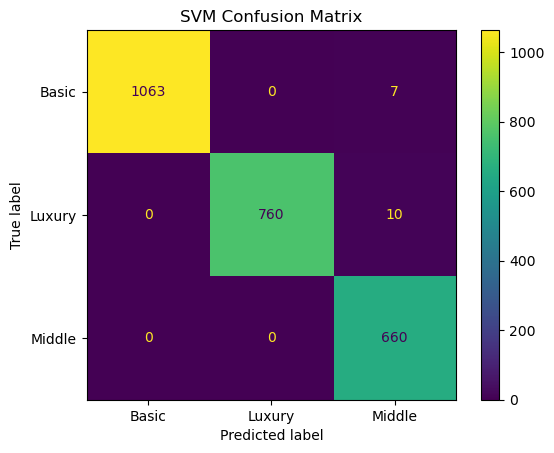

Classification report SVM:
               precision    recall  f1-score   support

       Basic       1.00      0.99      1.00      1070
      Luxury       1.00      0.99      0.99       770
      Middle       0.97      1.00      0.99       660

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



In [20]:
print("CV Score: {}".format(GSCV_SVM.best_score_))
print("Test Score: {}".format(GSCV_SVM.best_estimator_.score(x_test_enc, y_test)))
print("Best Model: {}", GSCV_SVM.best_estimator_)
mask = GSCV_SVM.best_estimator_.named_steps['feat_select'].get_support()
print("Best Features: {}", df_x_train_enc.columns[mask])

SVM_pred = GSCV_SVM.predict(x_test_enc)

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, SVM_pred, labels=GSCV_SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_SVM.classes_)
disp.plot()
plt.title("SVM Confusion Matrix")
plt.show()

print("Classification report SVM:\n", classification_report(y_test, SVM_pred))

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

pipe_GBT = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select', SelectKBest()),
    ('clf',GradientBoostingClassifier(random_state=72))])

params_grid_GBT = [
    {
        'scale': [MinMaxScaler()],
        'feat_select': [SelectKBest()],
        'feat_select__k':np.arange(2,6),
        'clf__max_depth':[*np.arange(3,4)],
        'clf__n_estimators':[100,150],
        'clf__learning_rate':[0.01,0.1,1]
    },
    {
        'scale': [MinMaxScaler()],
        'feat_select': [SelectPercentile()],
        'feat_select__percentile':np.arange(20,50),
        'clf__max_depth':[*np.arange(3,4)],
        'clf__n_estimators':[100,150],
        'clf__learning_rate':[0.01,0.1,1]
    },
    {
        'scale': [StandardScaler()],
        'feat_select': [SelectKBest()],
        'feat_select__k':np.arange(2,6),
        'clf__max_depth':[*np.arange(3,4)],
        'clf__n_estimators':[100,150],
        'clf__learning_rate':[0.01,0.1,1]
    },
    {
        'scale': [StandardScaler()],
        'feat_select': [SelectPercentile()],
        'feat_select__percentile':np.arange(20,50),
        'clf__max_depth':[*np.arange(3,4)],
        'clf__n_estimators':[100,150],
        'clf__learning_rate':[0.01,0.1,1]
    },
]

GSCV_GBT = GridSearchCV(pipe_GBT,params_grid_GBT,cv=StratifiedKFold(n_splits=5),n_jobs=-1)
GSCV_GBT.fit(x_train_enc,y_train.values.ravel())

print("GSCV Finished")

GSCV Finished


CV Score: 0.9996
Test Score: 0.9996
Best Model: {} Pipeline(steps=[('scale', MinMaxScaler()),
                ('feat_select', SelectPercentile(percentile=41)),
                ('clf', GradientBoostingClassifier(random_state=72))])
Best Features: {} Index(['onehotencoder__hasyard_no', 'onehotencoder__hasyard_yes',
       'onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'onehotencoder__isnewbuilt_old',
       'remainder__squaremeters', 'remainder__numberofrooms',
       'remainder__numprevowners'],
      dtype='object')


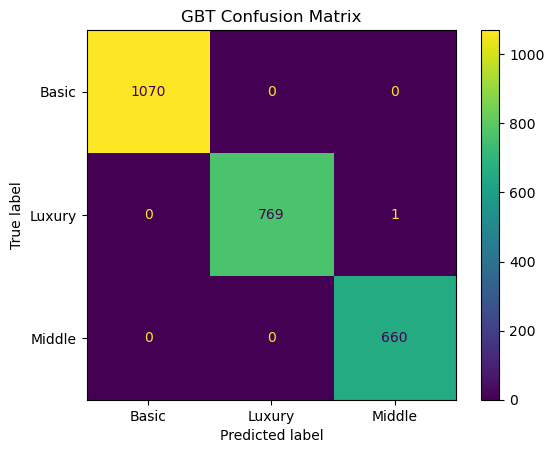

Classification report GBT:
               precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      1070
      Luxury       1.00      1.00      1.00       770
      Middle       1.00      1.00      1.00       660

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [24]:
print("CV Score: {}".format(GSCV_GBT.best_score_))
print("Test Score: {}".format(GSCV_GBT.best_estimator_.score(x_test_enc, y_test)))
print("Best Model: {}", GSCV_GBT.best_estimator_)
mask = GSCV_GBT.best_estimator_.named_steps['feat_select'].get_support()
print("Best Features: {}", df_x_train_enc.columns[mask])

GBT_pred = GSCV_GBT.predict(x_test_enc)

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, GBT_pred, labels=GSCV_GBT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_GBT.classes_)
disp.plot()
plt.title("GBT Confusion Matrix")
plt.show()

print("Classification report GBT:\n", classification_report(y_test, GBT_pred))

In [26]:
import pickle

with open('SVM_properti_model.pkl', 'wb') as r:
    pickle.dump((GSCV_SVM),r)

print("Model SVR berhasil disimpan")

Model SVR berhasil disimpan
